In [1]:
import numpy as np
import matplotlib.pyplot as plt


[0] = 0.0	0.0	-0.5576121133954905
[1] = 0.021713606309456956	0.013028163785674174	-0.5563561296341896
[2] = 0.04333291647912185	0.02599974988747311	-0.5550996074446317
[3] = 0.06485834001084545	0.03891500400650727	-0.5538425630048904
[4] = 0.0862902846281266	0.05177417077687596	-0.552585012523525
[5] = 0.1076291562838344	0.06457749377030064	-0.5513269722386587
[6] = 0.12887535916789816	0.0773252155007389	-0.5500684584170528
[7] = 0.15002929571496293	0.09001757742897776	-0.5488094873531766
[8] = 0.1710913666120123	0.10265481996720738	-0.5475500753682737
[9] = 0.19206197080595733	0.1152371824835744	-0.5462902388094243
[10] = 0.21294150551119495	0.12776490330671697	-0.5450299940486047
[11] = 0.23373036621712917	0.1402382197302775	-0.5437693574817434
[12] = 0.2544289466956656	0.15265736801739938	-0.5425083455277722
[13] = 0.27503763900866673	0.16502258340520004	-0.541246974627677
[14] = 0.29555683351538076	0.17733410010922845	-0.5399852612435436
[15] = 0.3159869188798331	0.1895921513278998

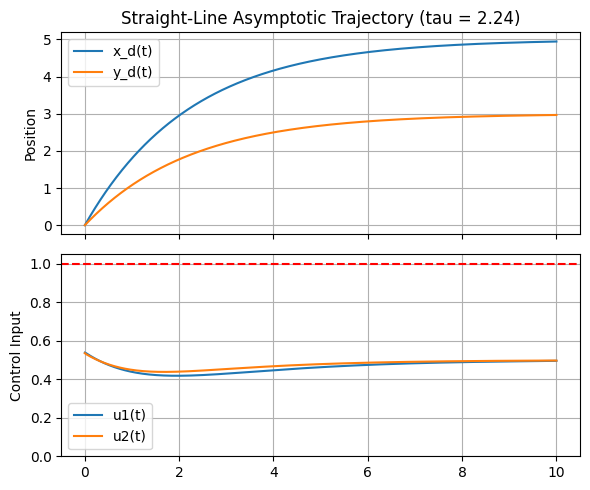

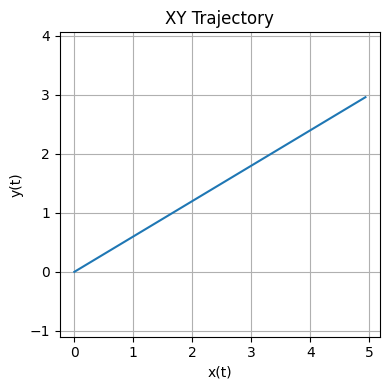

In [44]:
x_inf = 5
y_inf = 3
t = np.linspace(0, 10, 1000)
tau = 2.24

x = x_inf * (1 - np.exp(-t / tau))
y = y_inf * (1 - np.exp(-t / tau))
xdd = -x_inf * (1 / tau**2) * np.exp(-t / tau)
ydd = -y_inf * (1 / tau**2) * np.exp(-t / tau)
theta = np.arctan2(xdd, 1 - ydd)
for i in range(len(theta)):
    print(f"[{i}] = {xd[i]}\t{yd[i]}\t{theta[i]}")

dtheta_dt = np.gradient(theta, t)
ddtheta_dt = np.gradient(dtheta_dt, t)

# Total thrust
U = np.sqrt(xdd**2 + (ydd + 1)**2)

# Compute control inputs
u1 = 0.5 * (U + ddtheta_dt)
u2 = 0.5 * (U - ddtheta_dt)

plt.close()
# Plot trajectory
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5), sharex=True)
ax1.plot(t, x, label="x_d(t)")
ax1.plot(t, y, label="y_d(t)")
# ax1.plot(t, theta, label=r"$\theta$(t)")
ax1.set_ylabel("Position")
ax1.set_title("Straight-Line Asymptotic Trajectory (tau = {:.2f})".format(tau))
ax1.legend()
ax1.grid()

# Plot control inputs
ax2.plot(t, u1, label="u1(t)")
ax2.plot(t, u2, label="u2(t)")
ax2.axhline(1, color='r', linestyle='--')
ax2.axhline(-1, color='r', linestyle='--')
ax2.set_ylabel("Control Input")
ax2.set_ylim(0, 1.05)
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

# Plot xy path
fig2, (ax3) = plt.subplots(1, 1, figsize=(4, 4))
ax3.plot(xd, yd)
ax3.set_xlabel("x(t)")
ax3.set_ylabel("y(t)")
ax3.set_title("XY Trajectory")
ax3.axis('equal')
ax3.grid()

plt.tight_layout()
plt.show()